In [2]:
!pip install tensorflow-addons==0.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.7 MB/s eta 0:00:00


In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from tensorflow_addons.metrics import RSquare
from sklearn.model_selection import train_test_split
from keras.utils import plot_model

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [5]:
n=1000 # number of points
x = np.linspace(0,1,n)            #input data
x.shape

(1000,)

In [6]:
Y = np.sin(np.pi*x)   #Output data
random_numbers = np.random.uniform(0, 0.05, n)  #random noise
Y_noise = Y + random_numbers  #Noisy data
Y.shape

(1000,)

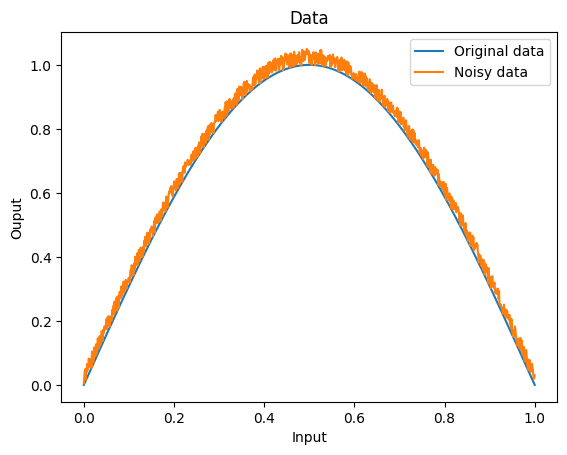

In [7]:
#plot original data and noisy data before  NN
plt.plot(x,Y, label='Original data')
plt.plot(x,Y_noise,label='Noisy data')
plt.title('Data')
plt.ylabel('Ouput')
plt.xlabel('Input')
plt.legend()
plt.show()

In [8]:
#splitting the dataset to training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, Y_noise, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800,), (200,), (800,), (200,))

In [9]:
# building the ANN model using tensorflow
model = Sequential()
model.add(Dense(8, activation = "relu", input_dim=1,name='hidden_1'))
#model.add(Dense(8, activation = "relu",name='hidden_2'))
#model.add(Dense(256, activation = "relu"))
#model.add(Dense(128, activation = "relu"))
model.add(Dense(1,name='output'))

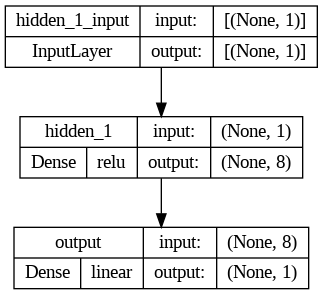

In [10]:
#visulize model
plot_model(model, show_shapes=True, show_layer_names=True,show_layer_activations=True)

In [11]:
#weights and bias values
print("Weights and biases of the layers before training the model: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")
  print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
#for layer in model.layers:
#    if (layer.name=='dense_25'):
#      print(layer.name)
#      a,b = layer.get_weights()[0].shape
#      c=layer.get_weights()[1].shape
#      print(c[0])
 #     layer.set_weights([10*np.random.randn(a,b), .5+np.random.randn(c[0])])

Weights and biases of the layers before training the model: 

hidden_1
Weights
Shape:  (1, 8) 
 [[ 0.790607   -0.04453558  0.4743091  -0.7969214  -0.71408355 -0.54591596
  -0.18687499  0.8091351 ]]
Bias
Shape:  (8,) 
 [0. 0. 0. 0. 0. 0. 0. 0.] 

output
Weights
Shape:  (8, 1) 
 [[ 0.42395818]
 [ 0.0227164 ]
 [-0.62867296]
 [ 0.13901144]
 [-0.0026179 ]
 [-0.8110424 ]
 [-0.39359602]
 [-0.2492342 ]]
Bias
Shape:  (1,) 
 [0.] 



In [12]:
# compile and train model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[keras.metrics.MeanAbsolutePercentageError()])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300,batch_size= 40)

Epoch 1/300
20/20 [==============================] - 1s 12ms/step - loss: 0.6005 - mean_absolute_percentage_error: 112.7031 - val_loss: 0.5223 - val_mean_absolute_percentage_error: 102.1423
Epoch 2/300
20/20 [==============================] - 0s 4ms/step - loss: 0.4957 - mean_absolute_percentage_error: 93.8187 - val_loss: 0.4326 - val_mean_absolute_percentage_error: 82.3662
Epoch 3/300
20/20 [==============================] - 0s 3ms/step - loss: 0.4099 - mean_absolute_percentage_error: 82.1765 - val_loss: 0.3589 - val_mean_absolute_percentage_error: 79.6427
Epoch 4/300
20/20 [==============================] - 0s 4ms/step - loss: 0.3402 - mean_absolute_percentage_error: 76.9715 - val_loss: 0.3002 - val_mean_absolute_percentage_error: 81.7135
Epoch 5/300
20/20 [==============================] - 0s 3ms/step - loss: 0.2837 - mean_absolute_percentage_error: 75.5111 - val_loss: 0.2547 - val_mean_absolute_percentage_error: 85.5995
Epoch 6/300
20/20 [==============================] - 0s 4ms/st

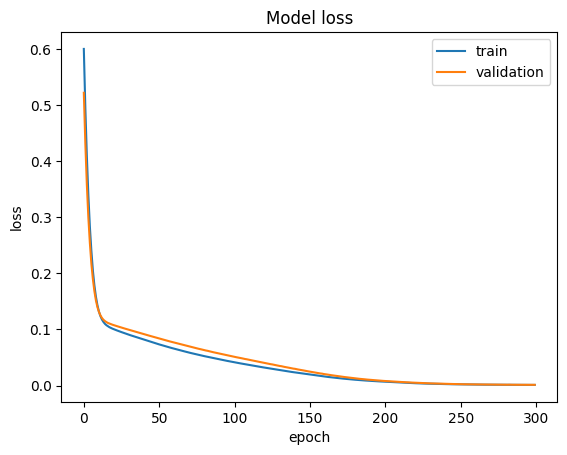

In [14]:
#plotting training history of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
#plt.xlim([100,300])
#plt.ylim([-.02,.02])
plt.show()

In [15]:
#model prediction on test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


32/32 [==============================] - 0s 1ms/step


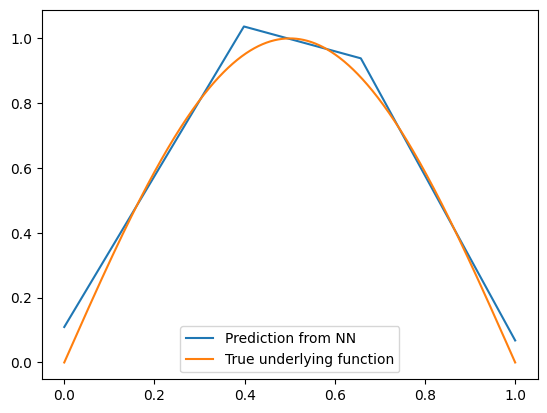

In [16]:
#plot comparing the actual output v/s NN output
y_pred=model.predict(x)
plt.plot(x,y_pred)
plt.plot(x,Y)
plt.legend(['Prediction from NN', 'True underlying function'])
#print("R2 Train", r2_train)
#print("R2 Test", r2_test)

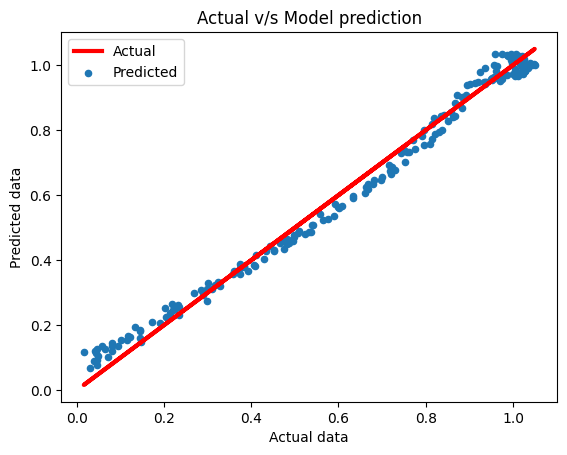

In [17]:
plt.plot(y_test,y_test, label='Actual', color='red',linewidth= 3)
plt.scatter(y_test,y_pred_test, label='Predicted',s = 20)
plt.title('Actual v/s Model prediction')
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.legend()
plt.show()